***A COMPARATIVE STUDY OF STUDENT SUCCESS AND RETENTION RATES IN PURSUING HIGHER EDUCATION.***

*A reputable university has provided us with restricted student data, which includes pertinent details about the students who are currently enrolled in the program, such as personal information and curriculum data.*

*We carried out in-depth exploratory data analysis (EDA) on the data and create a prediction model that employs a minimum of five machine learning algorithms to forecast whether or not a college student will graduate.*

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import pickle
import operator
from dython.nominal import associations
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics


**DATA CLEANING**

In [145]:
df = pd.read_csv("dataset.csv")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [146]:
df.drop_duplicates()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [147]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [149]:
df.rename(columns = {'Nacionality': 'Nationality'}, inplace = True)

In [150]:
df.shape

(4424, 35)

In [151]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [152]:
# Get all categorical variables except target.
cat_cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
          'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
          'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

# Get all continuous variables.
cont_cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
             'Unemployment rate', 'Inflation rate', 'GDP']

# Change categorical columns to category datatype.
df[cat_cols] = df[cat_cols].astype('category')

In [153]:
df.describe()

,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [154]:
df.describe(include=['category', 'O'])

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,2,17,21,29,34,32,46,2,2,2,2,2,2,2,3
top,1,1,1,12,1,1,1,1,27,10,10,1,0,0,1,0,0,0,Graduate
freq,3919,1708,3026,766,3941,3717,4314,1069,1209,1577,1010,2426,4373,3921,3896,2868,3325,4314,2209


**Exploratory Data Analysis**

In [155]:
df_copy = df.copy()

In [156]:
# Adjust some seaborn
colors = sns.color_palette('muted')
sns.set_palette('muted')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

colors_gender = {'Female': colors[0], 'Male': colors[1]}
colors_attendance = {'Evening': colors[0], 'Daytime': colors[1]}
colors_binary = {'Yes': colors[0], 'No': colors[1]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[-2], 'Enrolled': colors[4]}

In [157]:
df_copy['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

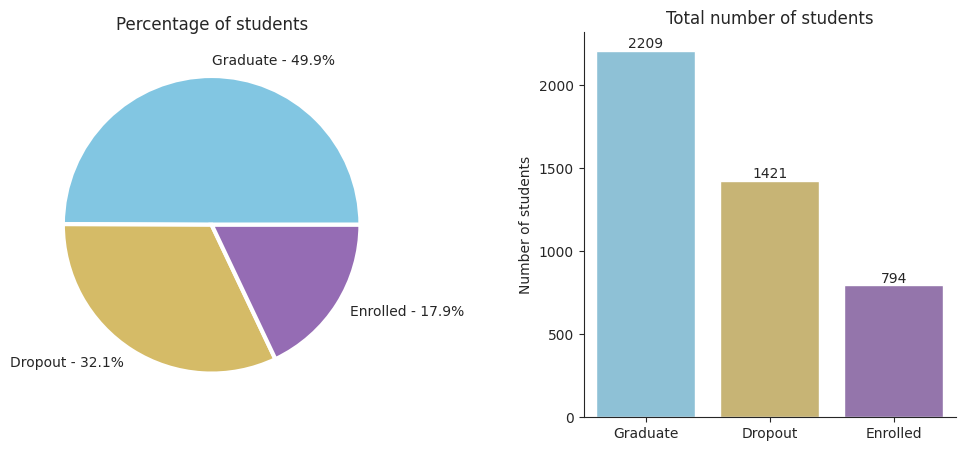

In [158]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df_copy['Target'].value_counts()

labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops={'linewidth': 3, 'edgecolor': 'white'},colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Percentage of students')

ax2 = sns.barplot(data=data.reset_index(), x='index', y='Target', palette=colors_target)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=data)
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students')

plt.show()

*There are more graduates than dropouts among the student body. 2209 + 1421 = 3630 is the total number of students who have graduated and dropped out, which is the amount of observations we needed to create our model.We will employ our approach for 794 students, which is 18% of the total number of students currently enrolled.*

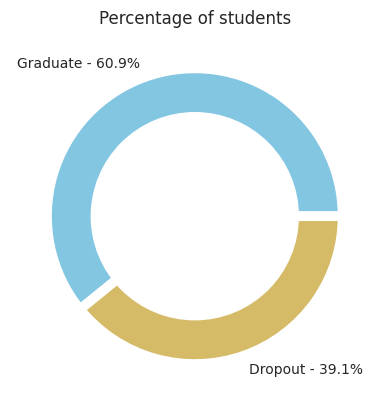

In [159]:
# Exclude currently enrolled students.
data = df_copy[df_copy['Target'] != 'Enrolled']['Target'].value_counts()

circle = plt.Circle((0,0), 0.7, color='white')
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
plt.pie(data, labels=labels, wedgeprops = {'linewidth' : 7, 'edgecolor' : 'white'}, colors=[colors_target.get(i) for i in data.index])
plt.title('Percentage of students')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

*Based on the pie chart, we can infer that six out of ten students graduated successfully, whereas four out of ten students were dropped out. Put otherwise, there exists a possibility that every third student may be at risk of discontinuing the course.*

**Gender**

In [160]:
# Replace Female and Male with 0 and 1 values respectively.
df_copy = df_copy.replace({'Gender': {0: 'Female', 1: 'Male'}})

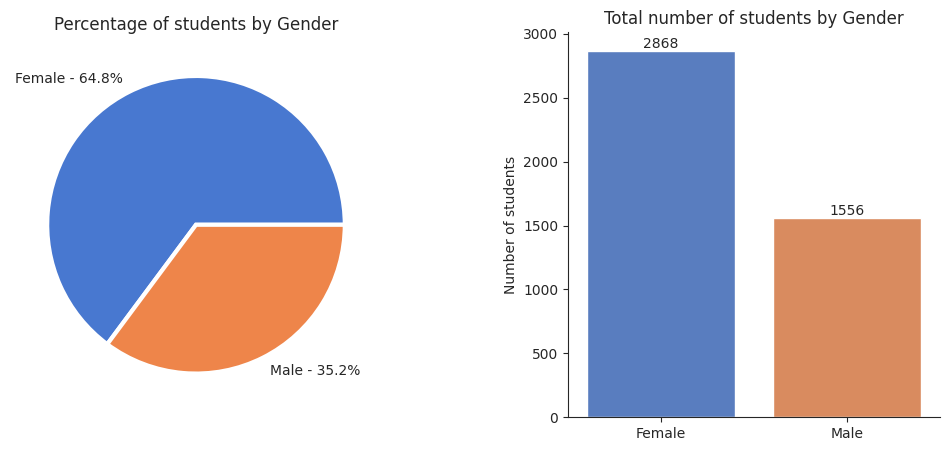

In [161]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data_gender = df_copy['Gender'].value_counts()

labels_gender = [f'{label} - {np.round(data_gender[label] / data_gender.sum() * 100, 1)}%' for label in data_gender.index]
ax1.pie(data_gender, labels=labels_gender, wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        colors=[colors_gender.get(i) for i in data_gender.index])
ax1.set_title('Percentage of students by Gender')

ax2 = sns.barplot(data=data_gender.reset_index(), x='index', y='Gender', palette=colors_gender)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=data_gender)
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of students by Gender')

plt.show()

*In the dataset, there are more female students than male students. There are 30% more female students than male students. Although there is a small imbalance in the dataset, it shouldn't have a big impact on the next model.*

*Make a stacked bar chart that displays the total number of students in both gender categories who are enrolled, graduated, and dropped out. Make a pie chart that shows the percentages of female students who graduate and drop out overall. Make a pie chart that represents the percentages of male students who graduate and drop out overall.*

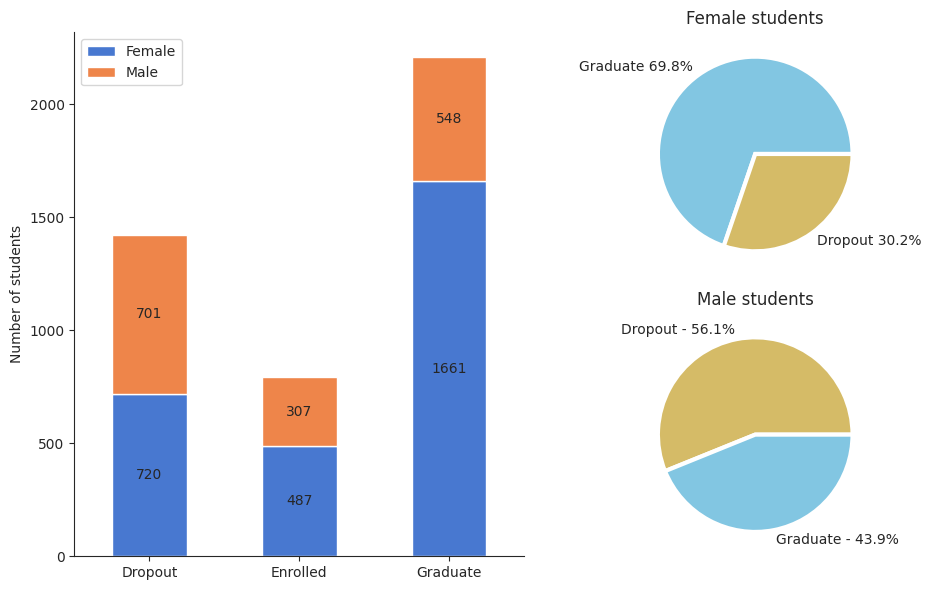

In [162]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)


ax1 = fig.add_subplot(gs[:, 0])
data = df_copy.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_gender.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)


females = df_copy[(df_copy['Gender'] == 'Female') & (df_copy['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')


males = df_copy[(df_copy['Gender'] == 'Male') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Male students')

plt.show()

*The number of dropout female and male students is almost equal. There are enrolled slightly more female students than male students. The number of graduated female students is around 3 times higher than male students. The female students graduation rate is higher than the graduation rate for male students. On the other hand, the percentage of dropout male students is higher than the percentage of graduated male students (56% and 44% respectively).*

**Age at enrollment**

In [163]:
# Find the optimal number of bins using Sturges’ rule.
bins = int(math.ceil(math.log2(len(df_copy))) + 1)
age_min = df_copy['Age at enrollment'].min()
age_max = df_copy['Age at enrollment'].max()
bin_int = df_copy['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

# Perform binning on Age at enrollment column.
age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
df_copy['Age at enrollment bins'] = pd.cut(df_copy['Age at enrollment'], bin_edges, labels=age_labels)

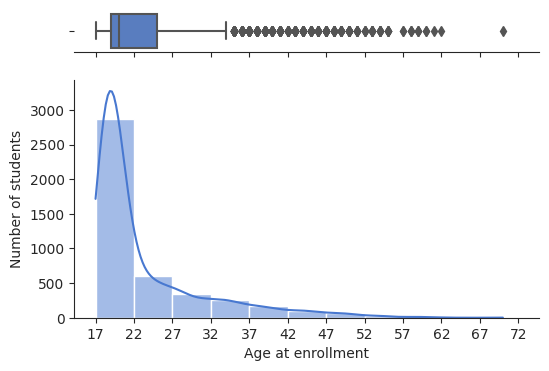

In [164]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})

# Create a boxplot.
ax1 = sns.boxplot(data=df_copy, x='Age at enrollment', ax=ax1)
ax1.set(xlabel=None)

# Create a histogram.
labels = df_copy['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df_copy, x='Age at enrollment', ax=ax2, bins=bins, binwidth=bin_int, kde=True)
ax2.set(ylabel='Number of students')

sns.despine(ax=ax1, left=True)
sns.despine(ax=ax2)


# Adjust x ticks.
plt.xticks(bin_edges)
plt.show()

*The vast majority of students are 17-22 years old. The number of students decreases as the students age increases.*

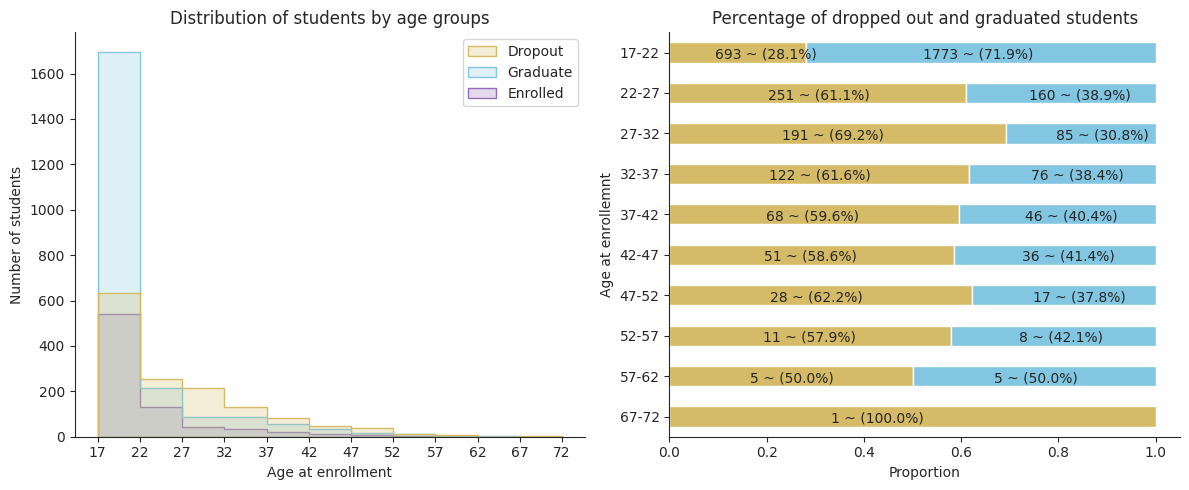

In [165]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a histogram.
ax1 = fig.add_subplot(gs[0, 0])
ax1 = sns.histplot(data=df_copy, x='Age at enrollment', hue='Target', element='step', bins=bins,
                  binwidth=bin_int, palette=colors_target)
ax1.set(ylabel='Number of students')
ax1.legend_.set_title(None)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Distribution of students by age groups')
plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df_copy['Age at enrollment bins'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df_copy['Age at enrollment bins'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Age at enrollemnt')
ax2.get_legend().remove()
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

*The highest graduation rate has the age group 17-22 with 72% of graduated students and 28% of dropped out srudents. There is no definitive distinction between other age groups, except 67-72 where only 1 student was dropped out.*

**Nationality**

In [166]:
# Replace numerical values with their verbal analogs.
df_copy[['Nationality']] = df[['Nationality']].replace({'Nationality': {1: 'Portuguese', 2: 'German', 3: 'Spanish',
                                                               4: 'Italian', 5: 'Dutch', 6: 'English',
                                                               7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean',
                                                               10: 'Guinean', 11: 'Mozambican', 12: 'Santomean',
                                                               13: 'Turkish', 14: 'Brazilian', 15: 'Romanian',
                                                               16: 'Moldovan', 17: 'Mexican', 18: 'Ukrainian',
                                                               19: 'Russian', 20: 'Cuban', 21: 'Colombian'}})

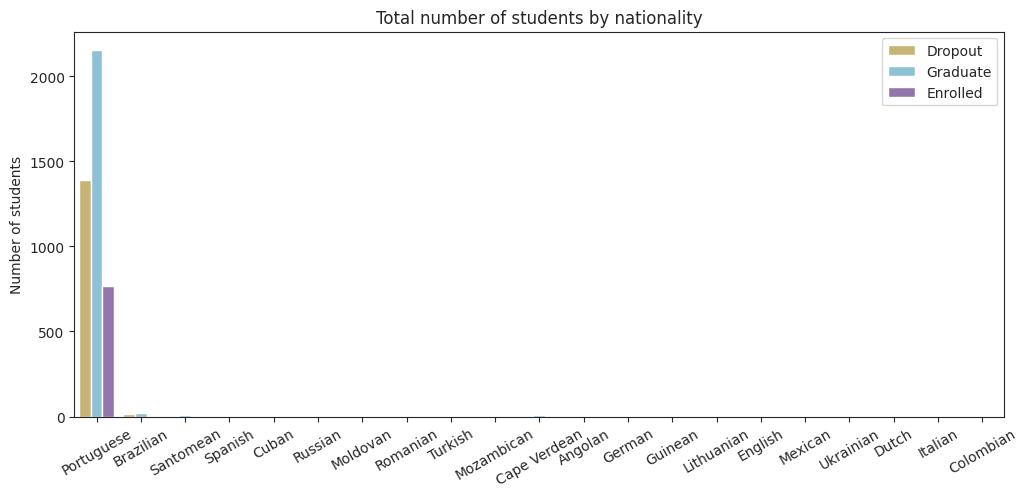

In [167]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 5))
order = df_copy[df_copy['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=df_copy, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

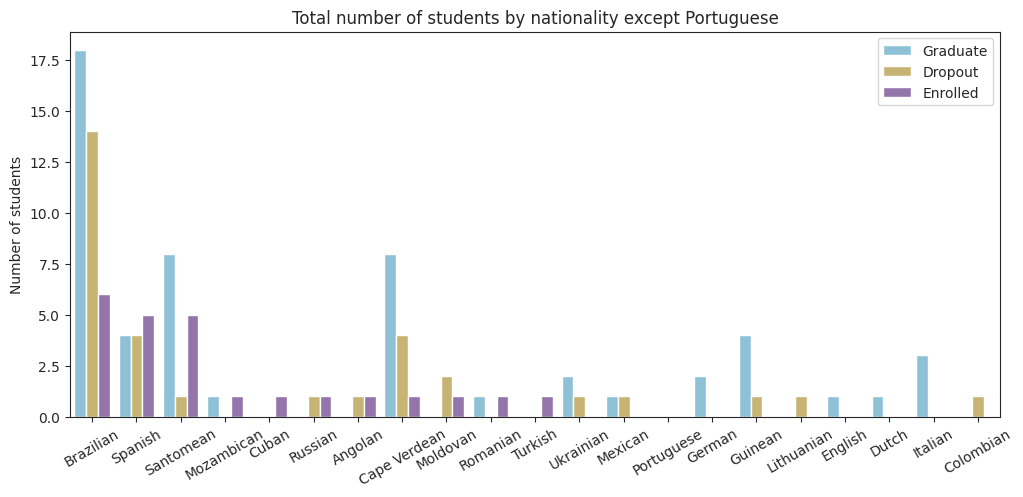

In [168]:
# Create a count plot wothout Portuguese students.
fig, ax = plt.subplots(figsize=(12, 5))
data = df_copy[df_copy['Nationality'] != 'Portuguese']
order = data[data['Target'] == 'Enrolled']['Nationality'].value_counts()
ax = sns.countplot(data=data, x='Nationality', hue='Target', palette=colors_target, order=order.index)
ax.set(xlabel=None, ylabel='Number of students', title='Total number of students by nationality except Portuguese')
plt.xticks(rotation=30)
ax.legend_.set_title(None)
plt.show()

**Marital status**

In [169]:
# Replace 1 - Single, 2 - Married, 3 - Widower, 4 - Divorced, 5 - Facto union, and 6 - Legally separated.
df_copy = df_copy.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                                    5: 'Facto union', 6: 'Legally separated'}})

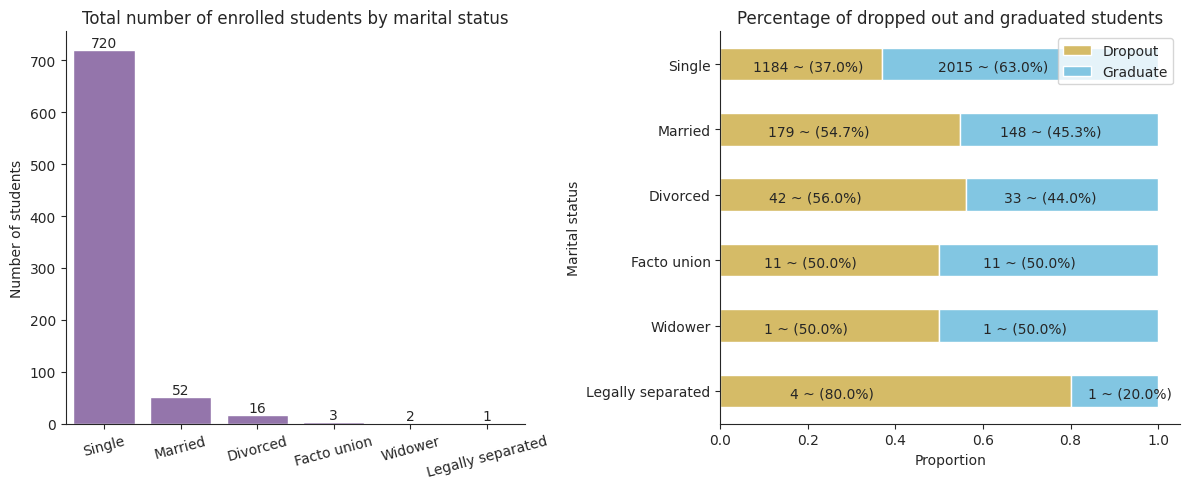

In [170]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df_copy[df_copy['Target'] == 'Enrolled']['Marital status'].value_counts()
order = data.index
ax1 = sns.barplot(y=data.values, x=data.index, color=colors[4], order=order)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by marital status')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df_copy['Marital status'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df_copy['Marital status'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Marital status')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

**Application Mode**

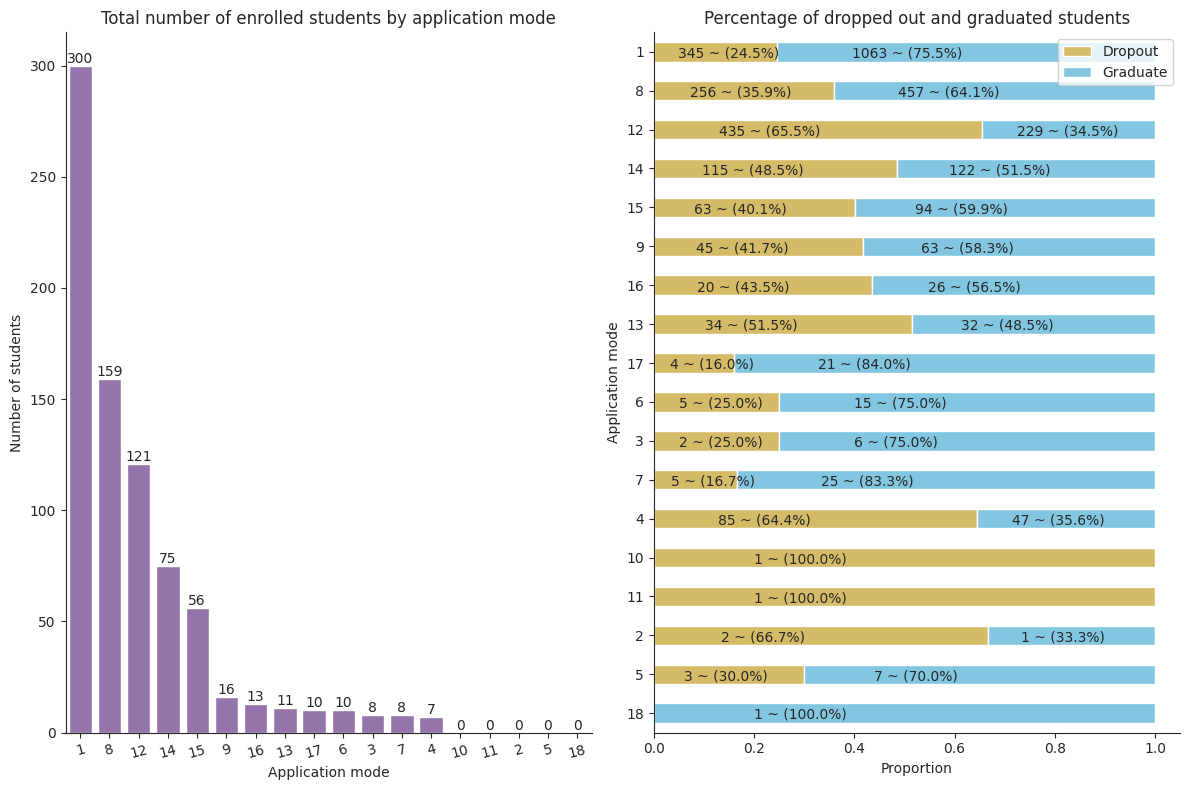

In [171]:
fig = plt.figure(figsize=(12, 8), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df_copy[df_copy['Target'] == 'Enrolled']['Application mode'].value_counts()
order = data.index
ax1 = sns.barplot(y=data.values, x=data.index, color=colors[4], order=order)
ax1.set(xlabel='Application mode', ylabel='Number of students')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Total number of enrolled students by application mode')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df_copy['Application mode'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df_copy['Application mode'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application mode')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()


**Daytime/evening Attendance**

In [172]:
# Replace 0 and 1 values with Female and Male respectively.
df_copy = df_copy.replace({'Daytime/evening attendance': {0: 'Evening', 1: 'Daytime'}})

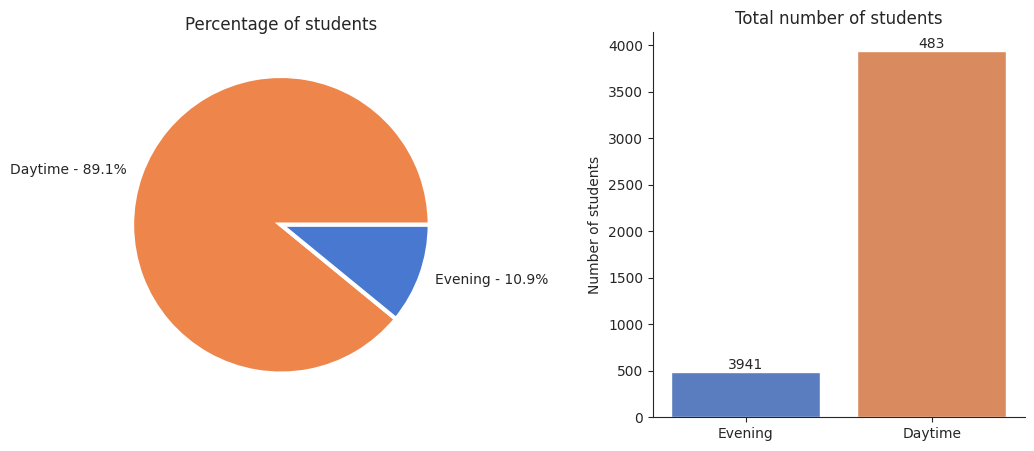

In [173]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df_copy['Daytime/evening attendance'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index],
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
ax1.set_title('Percentage of students')

# Create a bar plot.
ax2 = sns.barplot(y=data.values, x=data.index, palette=colors_attendance)
ax2.set(xlabel=None, ylabel='Number of students')
ax2.bar_label(container=ax2.containers[0], labels=data)
ax2.set_title('Total number of students')
ax2.spines[['right', 'top']].set_visible(False)
plt.show()

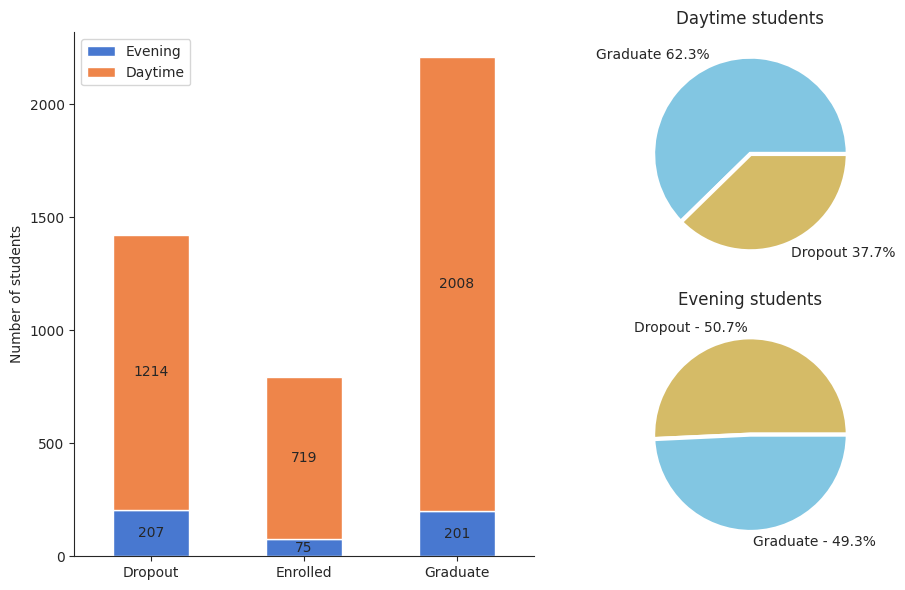

In [174]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(gs[:, 0])
data = df_copy.groupby(['Daytime/evening attendance',
                   'Target']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

daytime = df_copy[(df_copy['Daytime/evening attendance'] == 'Daytime') & (df_copy['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Daytime students')

evening = df_copy[(df_copy['Daytime/evening attendance'] == 'Evening') & (df_copy['Target'] != 'Enrolled')]['Target'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[1, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Evening students')

plt.show()

**Course**

In [175]:
# Replace numerical values with their verbal analogs.
df_copy[['Course']] = df_copy[['Course']].replace({'Course': {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design',
                                                    3: 'Social Service (evening attendance)', 4: 'Agronomy',
                                                    5: 'Communication Design', 6: 'Veterinary Design',
                                                    7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
                                                    10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
                                                    14: 'Advertising and Marketing Management',
                                                    15: 'Journalism and Communication', 16: 'Basic Education',
                                                    17: 'Management (evening attendance)'}})

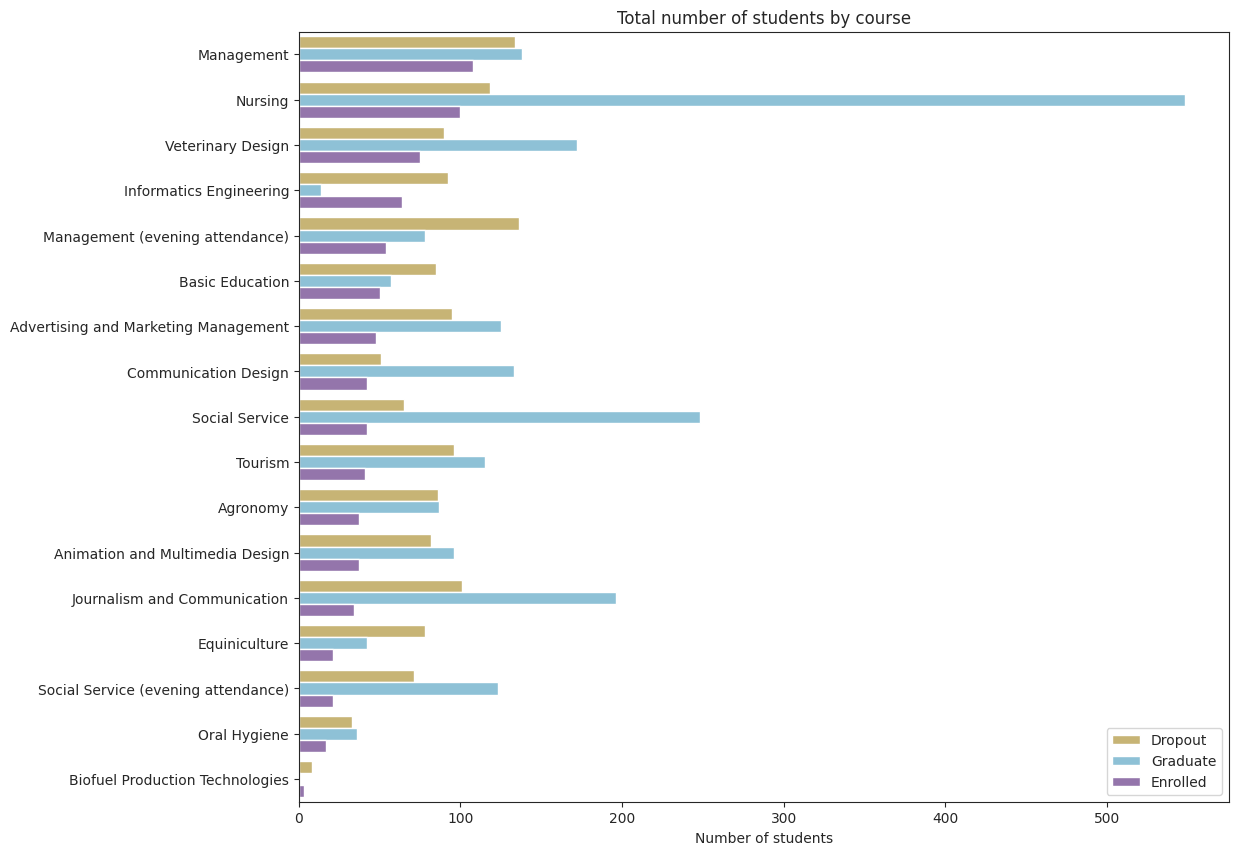

In [176]:
# Create a count plot.
fig, ax = plt.subplots(figsize=(12, 10))
order = df_copy[df_copy['Target'] == 'Enrolled']['Course'].value_counts().index
ax = sns.countplot(data=df_copy, y='Course', hue='Target', palette=colors_target, order=order)
ax.set(xlabel='Number of students', ylabel=None, title='Total number of students by course')
ax.legend_.set_title(None)
plt.show()

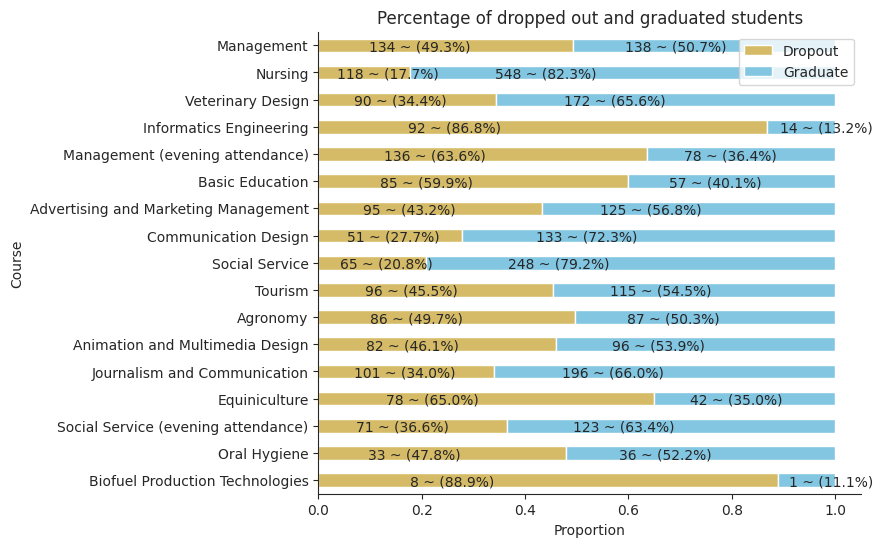

In [177]:
data = pd.crosstab(index=df_copy['Course'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'])
data_prop = pd.crosstab(index=df_copy['Course'], columns=df_copy[df_copy['Target'] != 'Enrolled']['Target'], normalize='index')
ax = data_prop.loc[order[::-1]].plot(kind='barh', stacked=True,
                                     color=[colors_target.get(i) for i in data.columns], figsize=(7, 6))
ax.set(xlabel='Proportion', ylabel='Course')
ax.spines[['right', 'top']].set_visible(False)
ax.legend_.set_title(None)
ax.set_title('Percentage of dropped out and graduated students')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.2, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

**Displaced, Educational special needs, Debtor, Tuition fees up to date, Scholarship holder, International**

In [178]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
# Replace 0 and 1 values with No and Yes respectively.
for col in cols:
    df_copy = df_copy.replace({col: {0: 'No', 1: 'Yes'}})

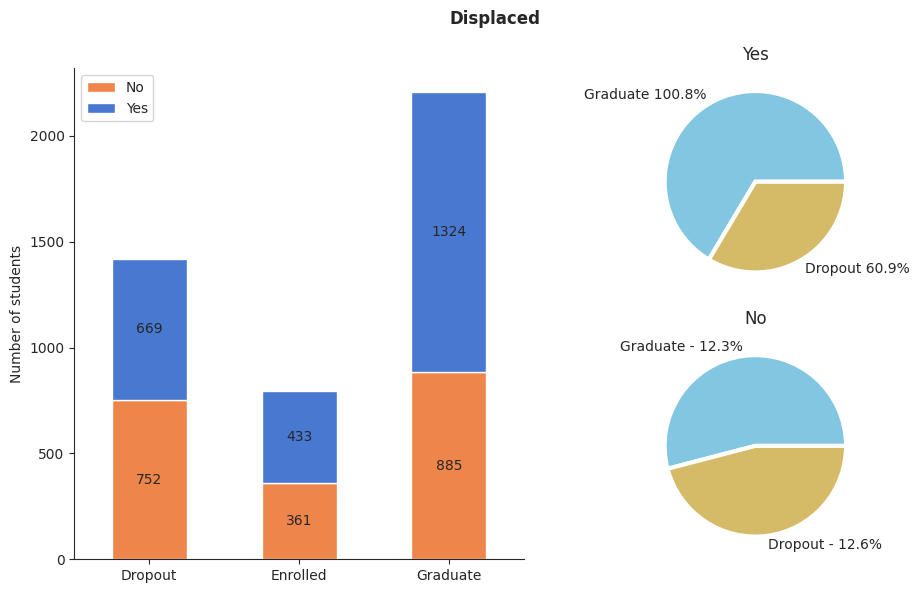

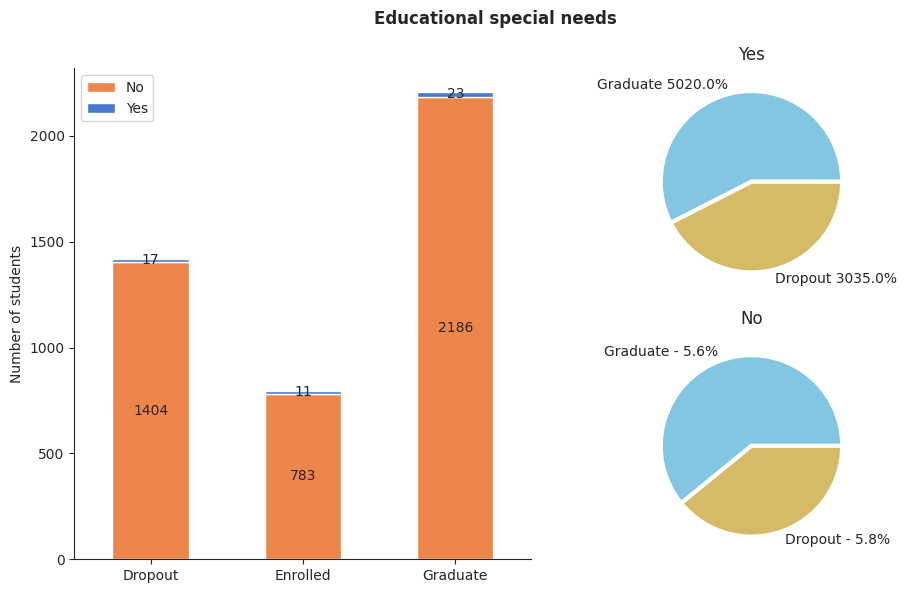

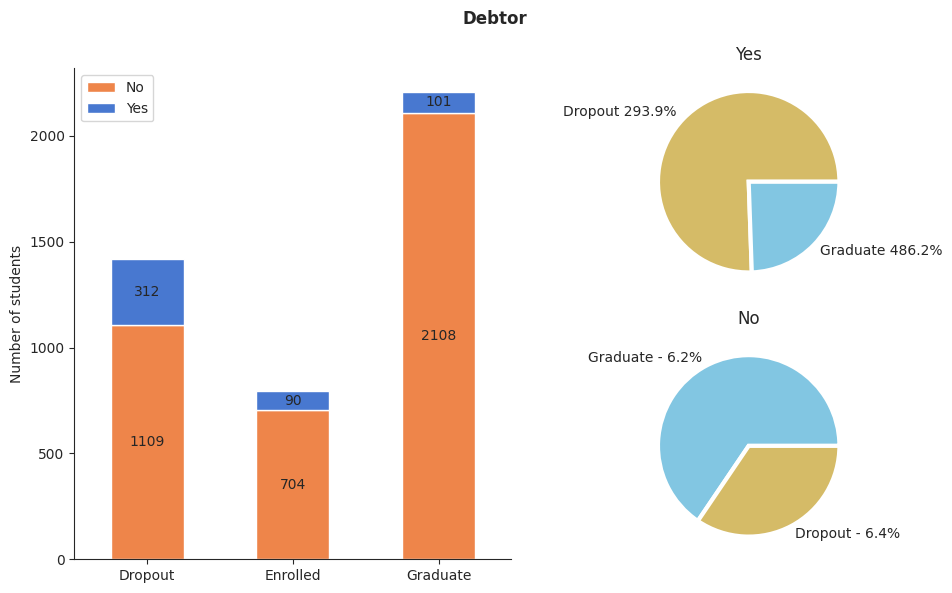

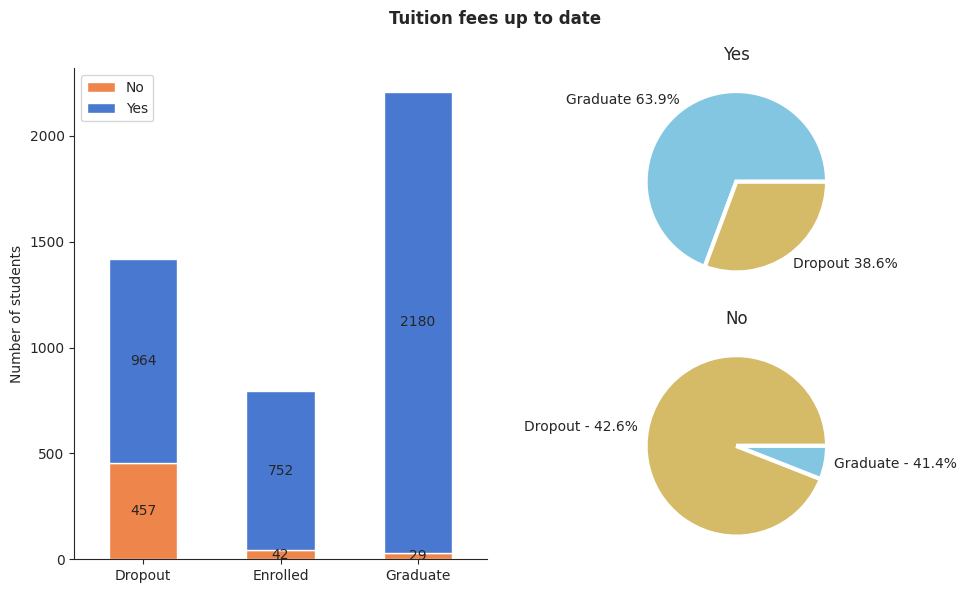

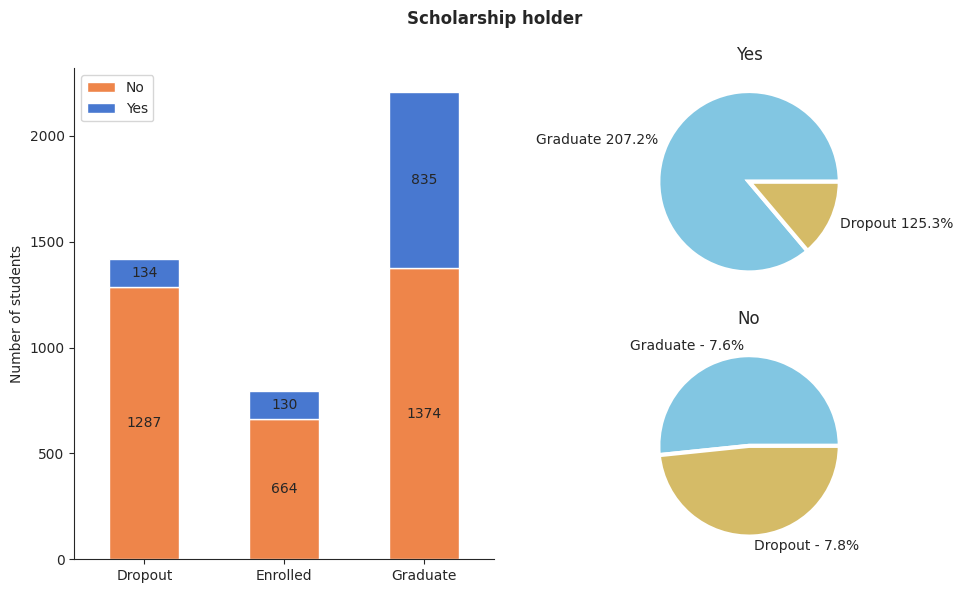

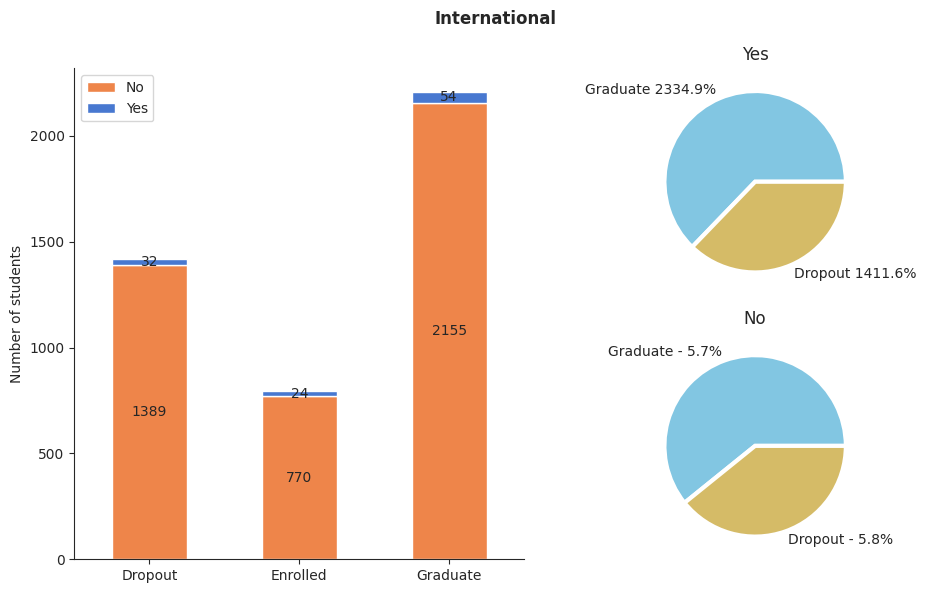

In [179]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=2, ncols=2)

    # Create a stacked barchart.
    ax1 = fig.add_subplot(gs[:, 0])
    data = df_copy.groupby([col, 'Target']).size().reset_index().pivot(columns=col, index='Target', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    # Create a pie chart with parameter Yes.
    yes = df_copy[(df_copy[col] == 'Yes') & (df_copy['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    ax2 = fig.add_subplot(gs[0, 1])
    patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index], wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax2.set(title='Yes')

    # Create a pie chart with parameter No.
    no = df_copy[(df_copy[col] == 'No') & (df_copy['Target'] != 'Enrolled')]['Target'].value_counts()
    labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index],
            wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    ax3.set(title='No')

    fig.suptitle(col, weight='bold')
    plt.show()

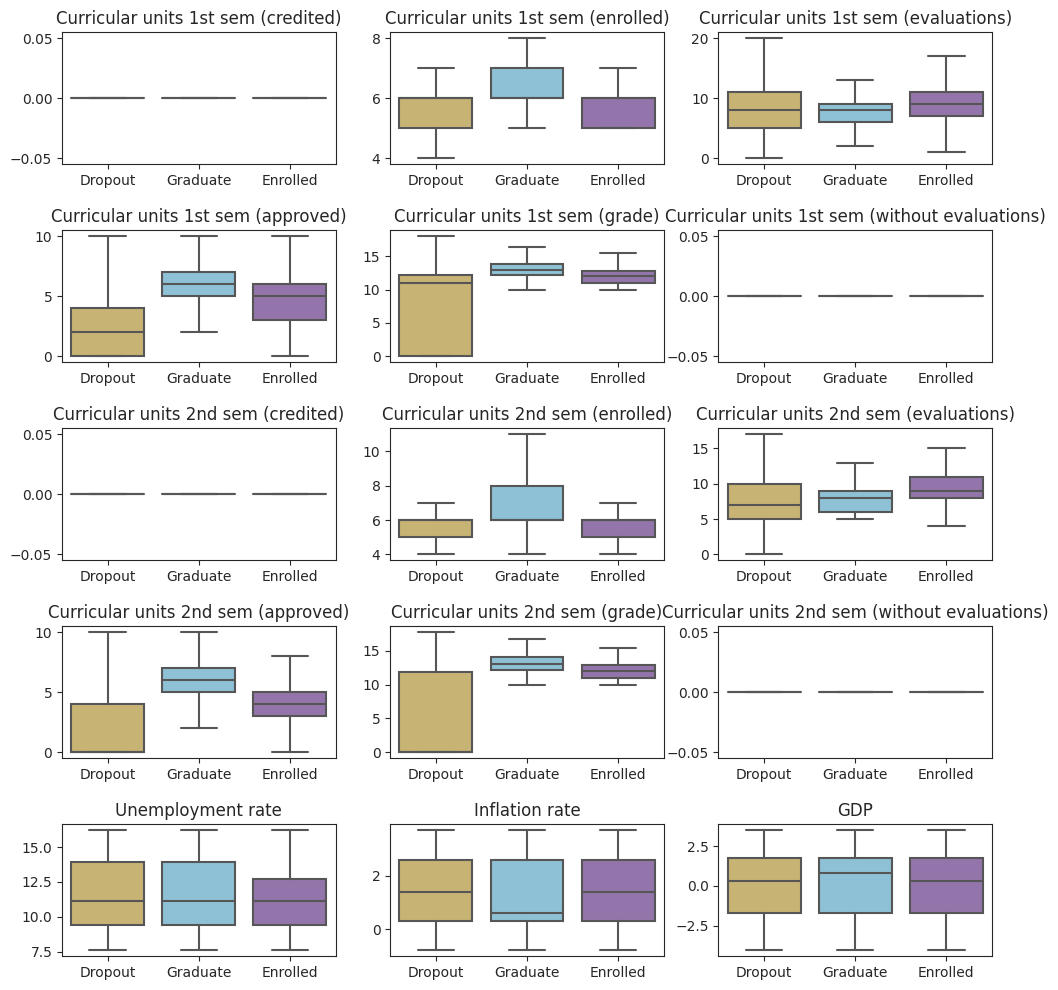

In [180]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(df_copy, x='Target', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1


**Feature Engineering**

In [181]:
df_copy= df.copy()

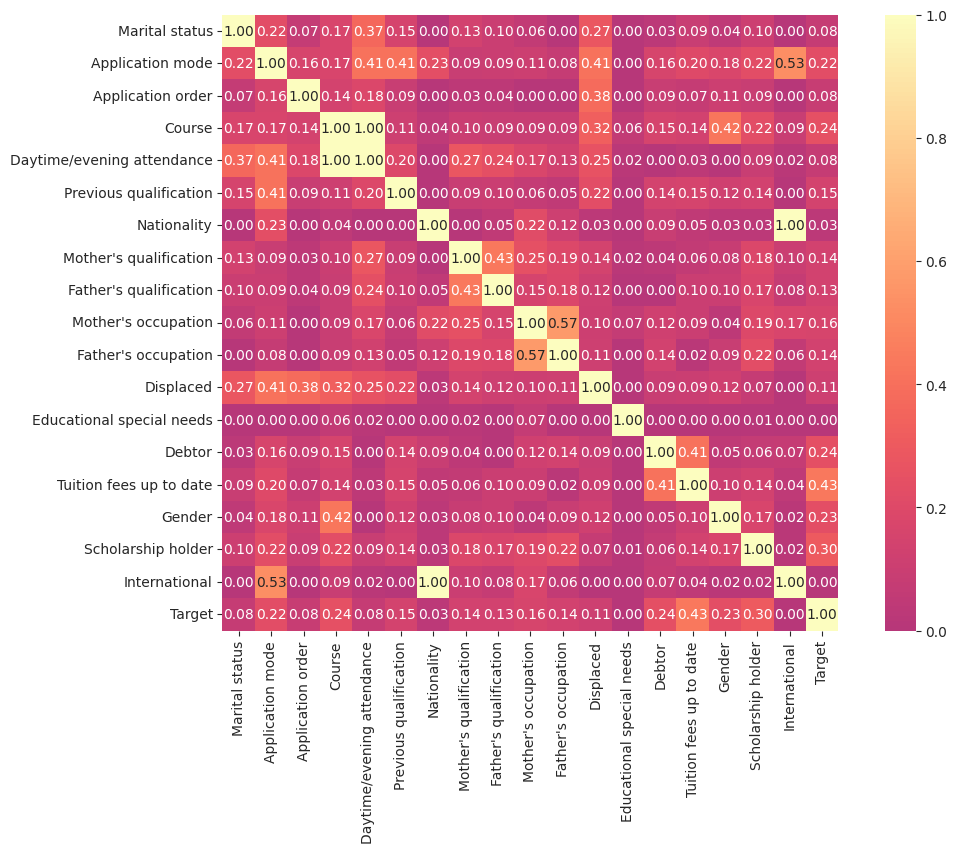

In [182]:
cols = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
        'Previous qualification', 'Nationality', "Mother's qualification", "Father's qualification",
        "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate Cramer's V association plot.
cramers_v = associations(df_copy[cols], nom_nom_assoc='cramer', ax=ax, cmap='magma')

*It is evident that certain aspects exhibit strong correlations with one another; nevertheless, these features are redundant and do not add new information to the model. The occupations of the mother and father are positively correlated (0.57). Only Mother's occupation should be kept, as it has a stronger correlation with the target. The qualifications of the mother and father are positively correlated (0.43). Only Mother's qualification should be kept since it is more closely associated with the target. As of the now, there is a strong correlation between debtor and tuition fees (0.41). Only tuition costs should be kept current because they are more closely related to the target. Application mode and displacement have a strong correlation (0.41). Only use the Application mode since it is more closely associated with the Target.*

*We will choose the following categorical factors based on the association matrix: application mode, course, prior qualification, mother's qualification, current tuition fees, mother's occupation, gender, and scholarship holder.*

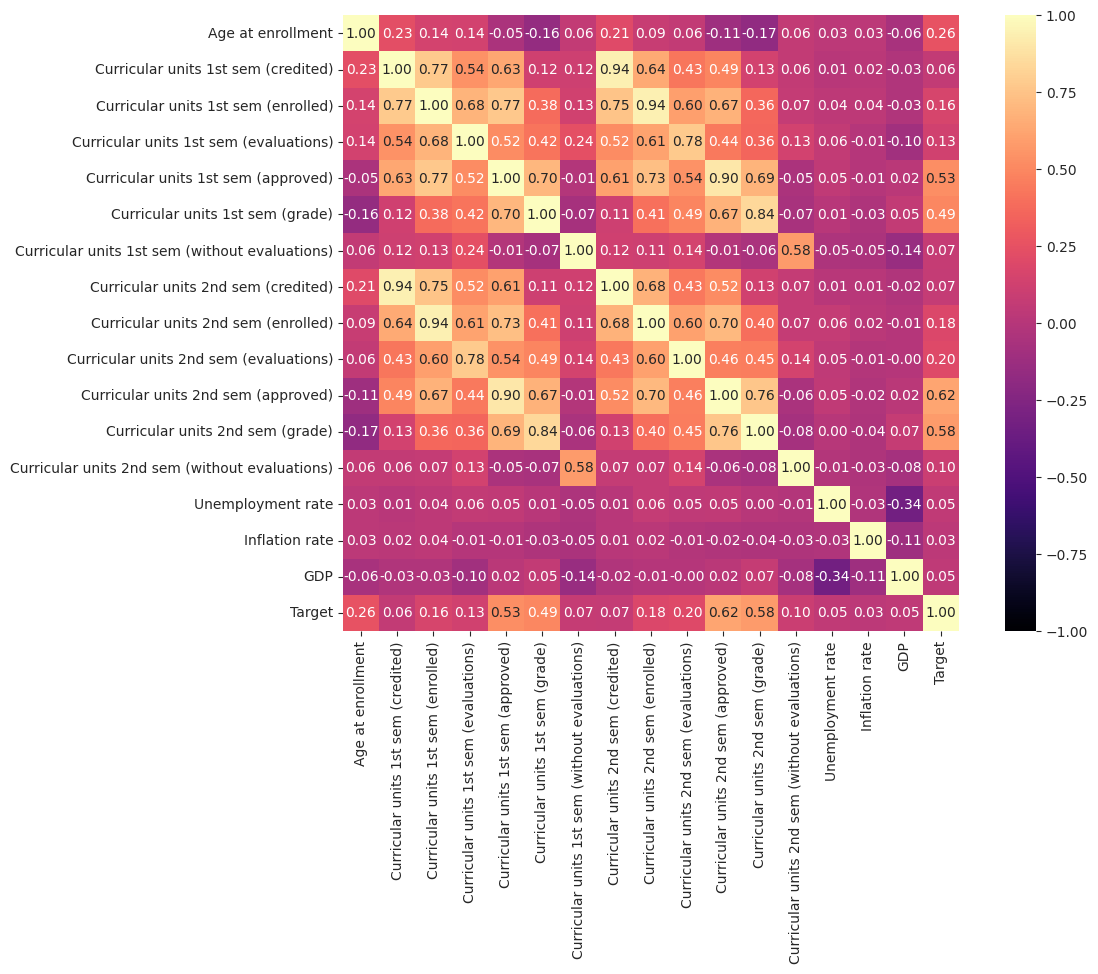

In [183]:
cols = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate coorelation ratio association plot.
cor_ratio = associations(df_copy[cols], nom_num_assoc='correlation_ratio', num_num_assoc='pearson', ax=ax, cmap='magma')

*We will choose the following categorical features based on the association matrix: Age at enrollment, First semester curricula approved, second semester curricula approved.*

In [184]:
df = df.drop(columns=["Nationality", "Marital status", "Application order", "Daytime/evening attendance", "Father's qualification", "Father's occupation", "Inflation rate", "Educational special needs", "International", "Unemployment rate"], axis=1)

In [185]:
df.head()

,Application mode,Course,Previous qualification,Mother's qualification,Mother's occupation,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,8,2,1,13,6,1,0,1,1,0,...,0.000000,0,0,0,0,0,0.000000,0,1.74,Dropout
1,6,11,1,1,4,1,0,0,1,0,...,14.000000,0,0,6,6,6,13.666667,0,0.79,Graduate
2,1,5,1,22,10,1,0,0,1,0,...,0.000000,0,0,6,0,0,0.000000,0,1.74,Dropout
3,8,15,1,23,6,1,0,1,0,0,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,Graduate
4,12,3,1,22,10,0,0,1,0,0,...,12.333333,0,0,6,6,6,13.000000,0,0.79,Graduate


In [186]:
# Remove enrolled students.
df = df[df['Target'] != 'Enrolled']

# Convert into numerical data type.
df['Tuition fees up to date'] = df['Tuition fees up to date'].astype('int32')
df['Gender'] = (df['Gender'] == 'Female').astype('int32')  # Assuming 'Female' is the positive class.
df['Scholarship holder'] = df['Scholarship holder'].astype('int32')
df['Target'] = (df['Target'] == 'Graduate').astype('int32')  # Assuming 'Graduate' is the positive class.

# Perform one-hot encoding.
df = pd.get_dummies(df, drop_first=True)

<ipython-input-186-8a0c0feaaead>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tuition fees up to date'] = df['Tuition fees up to date'].astype('int32')
<ipython-input-186-8a0c0feaaead>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = (df['Gender'] == 'Female').astype('int32')  # Assuming 'Female' is the positive class.
<ipython-input-186-8a0c0feaaead>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

**Building Model**

In [187]:
results = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [188]:
# Predicting variable.
y = df['Target']

# Predictor features.
X = df.copy()
X = X.drop('Target', axis = 1)

# Create training and test sets, 75% and 25% respectively.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [189]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'], )
    disp.plot(values_format='')
    plt.show()

In [190]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    auc = metrics.roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

In [191]:
def print_results(algo, y_test, y_preds):

    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds))
    # Write results into a dataframe.
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds),
           'Precision': metrics.precision_score(y_test, y_preds), 'Recall': metrics.recall_score(y_test, y_preds),
           'F1 Score': metrics.f1_score(y_test, y_preds)}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

In [202]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {

            'GradientBoosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.05, 0.1, 0.2],
                'max_depth': [3, 4, 5]
            }
        },
        'DecisionTree': {
              'model': DecisionTreeClassifier(),
              'params': {
                  'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random']
            }
          },

          'SVM': {
              'model': SVC(gamma='auto'),
              'params': {
                  'C': [1, 10, 20],
                  'kernel': ['rbf', 'linear']
              }
          },

          'Randomforest':{
              'model':RandomForestClassifier(),
              'params':{
                  'n_estimators':[1,5,10]
              }
          },

          'LogisticRegression':{
          'model':LogisticRegression(solver='liblinear',multi_class='auto'),
          'params':{
              'C':[1,5,10]
          },

          }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,GradientBoosting,0.909091,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,DecisionTree,0.866942,"{'criterion': 'entropy', 'splitter': 'best'}"
2,SVM,0.910744,"{'C': 1, 'kernel': 'linear'}"
3,Randomforest,0.885675,{'n_estimators': 10}
4,LogisticRegression,0.909366,{'C': 5}


**Logistic regression**

In [203]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_scaled_train, y_train)
y_preds = lr.predict(X_scaled_test)

In [204]:
print_results('Logistic regression', y_test, y_preds)

Logistic regression
Accuracy: 0.915
Precision: 0.896
Recall: 0.970
F1 Score: 0.931


**SVM**

In [205]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
svm = SVC(probability=True)
svm.fit(X_scaled_train, y_train)
y_preds = svm.predict(X_scaled_test)

In [206]:
print_results('SVM', y_test, y_preds)

SVM
Accuracy: 0.895
Precision: 0.863
Recall: 0.980
F1 Score: 0.917


**Gradient Boosting**

In [207]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)
grb = GradientBoostingClassifier()
grb.fit(X_scaled_train, y_train)
y_preds = grb.predict(X_scaled_test)

In [208]:
print_results('Gradient Boosting', y_test, y_preds)

Gradient Boosting
Accuracy: 0.909
Precision: 0.900
Recall: 0.952
F1 Score: 0.925


**Decision Tree**

In [209]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
y_preds = decision_tree.predict(X_test)

In [210]:
print_results('Decision Tree', y_test, y_preds)

Decision Tree
Accuracy: 0.878
Precision: 0.901
Recall: 0.892
F1 Score: 0.897


**Random forest**

In [211]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)

In [212]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.902
Precision: 0.884
Recall: 0.961
F1 Score: 0.921


**Hyperparameter tuning**

In [214]:
# Determine set of hyperparameters.
cv_params = {'n_estimators' : [25, 50, 75, 100],
              'max_depth' : [10, 30, 50, 70],
              'min_samples_leaf' : [0.5, 0.75, 1],
              'min_samples_split' : [0.001, 0.005, 0.01],
              'max_features' : ['sqrt'],
              'max_samples' : [.3, .5, .7, .9]}

# Instantiate model.
rf = RandomForestClassifier(random_state=0)

# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, cv=3, refit='accuracy', n_jobs = -1, verbose = 1)

# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70],
                         'max_features': ['sqrt'],
                         'max_samples': [0.3, 0.5, 0.7, 0.9],
                         'min_samples_leaf': [0.5, 0.75, 1],
                         'min_samples_split': [0.001, 0.005, 0.01],
                         'n_estimators': [25, 50, 75, 100]},
             refit='accuracy', verbose=1)

In [215]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 0.005,
 'n_estimators': 50}

In [216]:
# Determine new set of hyperparameters.
cv_params = {'n_estimators' : [40, 45, 50, 55],
              'max_depth' : [20, 25, 30, 35],
              'min_samples_leaf' : [0.8, 0.9, 1],
              'min_samples_split' : [0.0005, 0.001, 0.0015, 0.002],
              'max_features' : ['sqrt'],
              'max_samples' : [.2, .25, .3, .35]}

rf = RandomForestClassifier(random_state=0)
rf_val = GridSearchCV(rf, cv_params, cv=3, refit='accuracy', n_jobs = -1, verbose = 1)
rf_val.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'max_features': ['sqrt'],
                         'max_samples': [0.2, 0.25, 0.3, 0.35],
                         'min_samples_leaf': [0.8, 0.9, 1],
                         'min_samples_split': [0.0005, 0.001, 0.0015, 0.002],
                         'n_estimators': [40, 45, 50, 55]},
             refit='accuracy', verbose=1)

In [217]:
rf_val.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.35,
 'min_samples_leaf': 1,
 'min_samples_split': 0.0015,
 'n_estimators': 45}

In [218]:
rf_opt = RandomForestClassifier(n_estimators=55, max_depth=25, min_samples_leaf=1,
                                min_samples_split=0.0015, max_features='sqrt', max_samples=0.3)
rf_opt.fit(X_train, y_train)
y_preds = rf_opt.predict(X_test)

In [219]:
print_results('Random forest', y_test, y_preds)

Random forest
Accuracy: 0.911
Precision: 0.889
Recall: 0.970
F1 Score: 0.928


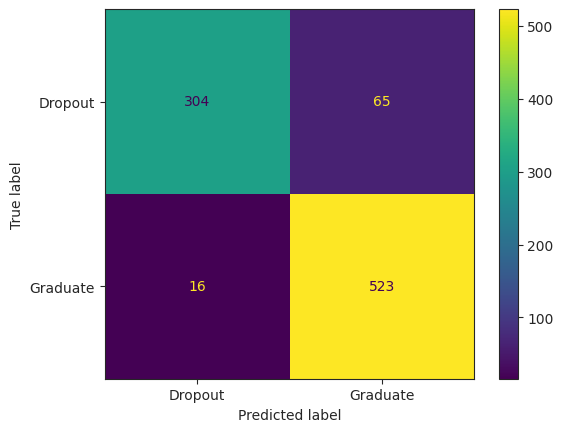

In [220]:
conf_matrix_plot(rf_opt, X_test, y_test)

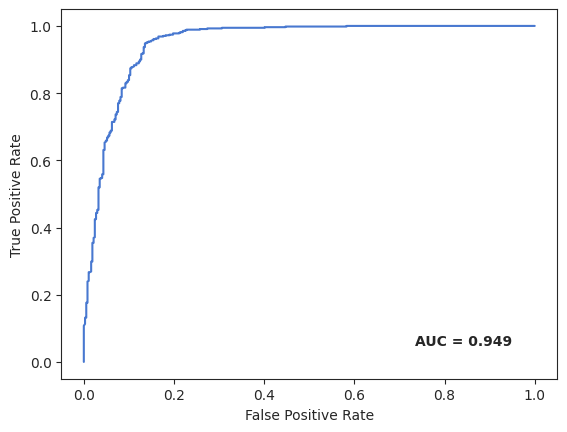

In [221]:
y_preds_prob = rf_opt.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_preds_prob)

**CONCLUSION:**
- Random Forest gives better accuracy as compared to any other algorithm with little over 91%.
- These are the values for following parameters:
    Precision: 0.889, Recall: 0.970, F1 Score: 0.928.
- Few parameters in the dataset had negative Correlation. When two variables have an inverse correlation, or negative correlation, one variable rises as the other falls, and vice versa. This relationship describes an observable pattern; it may or may not indicate that the two variables are causally related.So, we dropped those columns to get highly correlated data whcih will increase the accuracy of our model.